# SARIMA FORECASTING

C:\Users\Raniella Cuevas\AppData\Local\Temp\ipykernel_19172\3126336993.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pax = df.resample('M').sum()['pax']
C:\Users\Raniella Cuevas\AppData\Local\Temp\ipykernel_19172\3126336993.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_pax.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


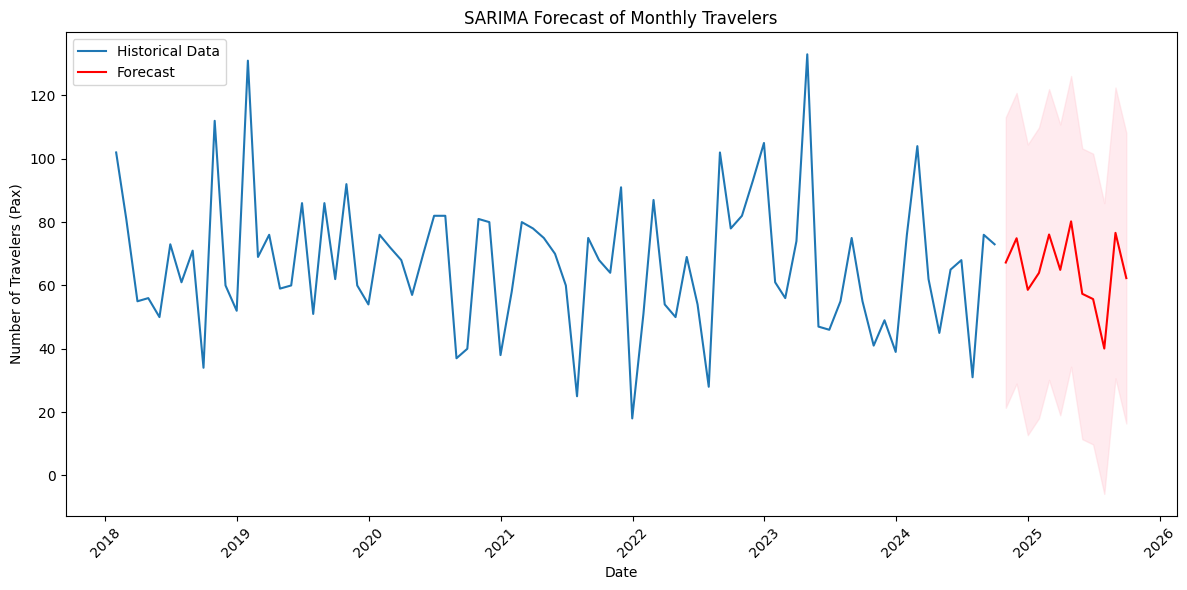

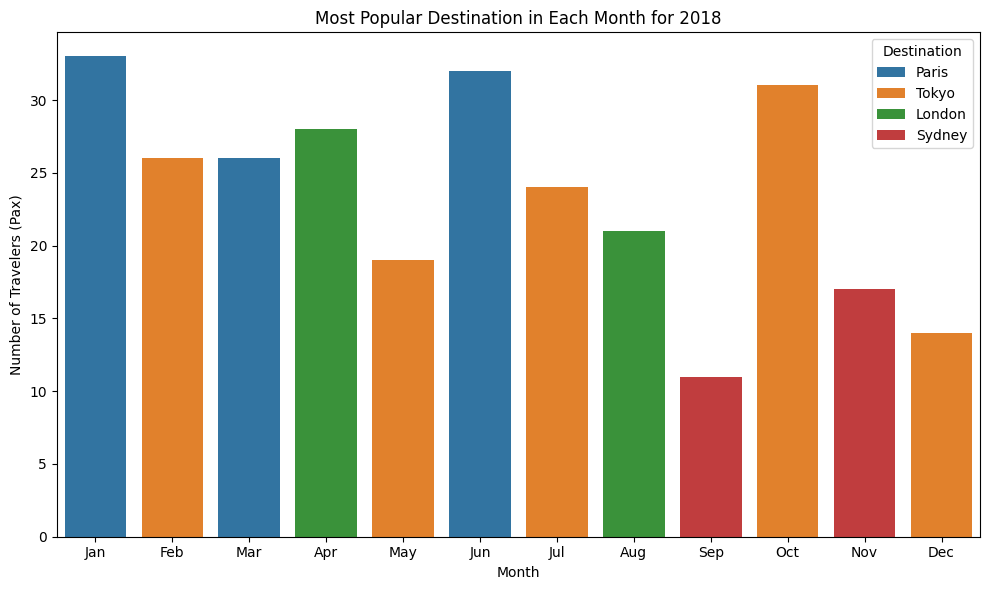

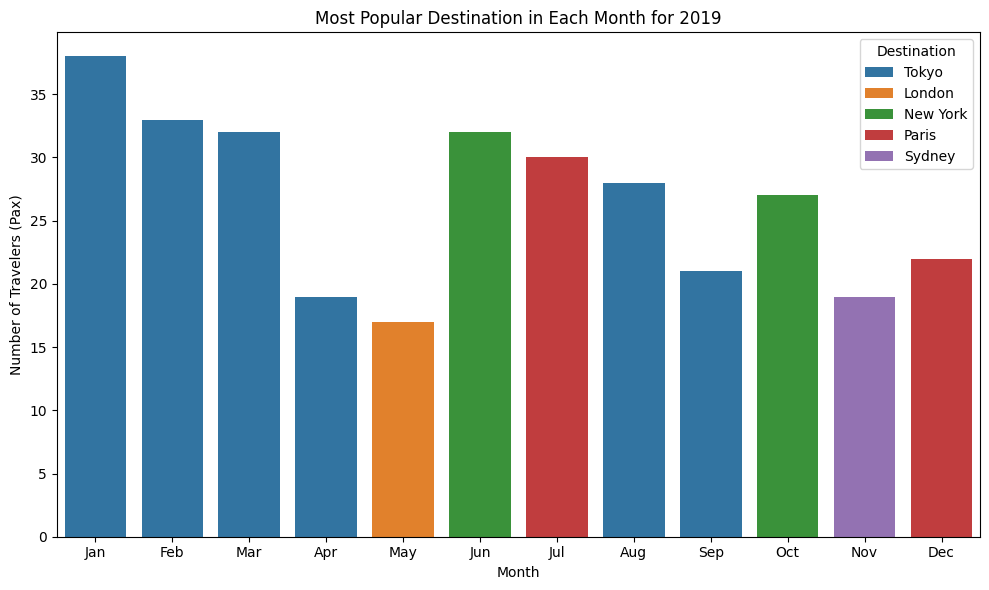

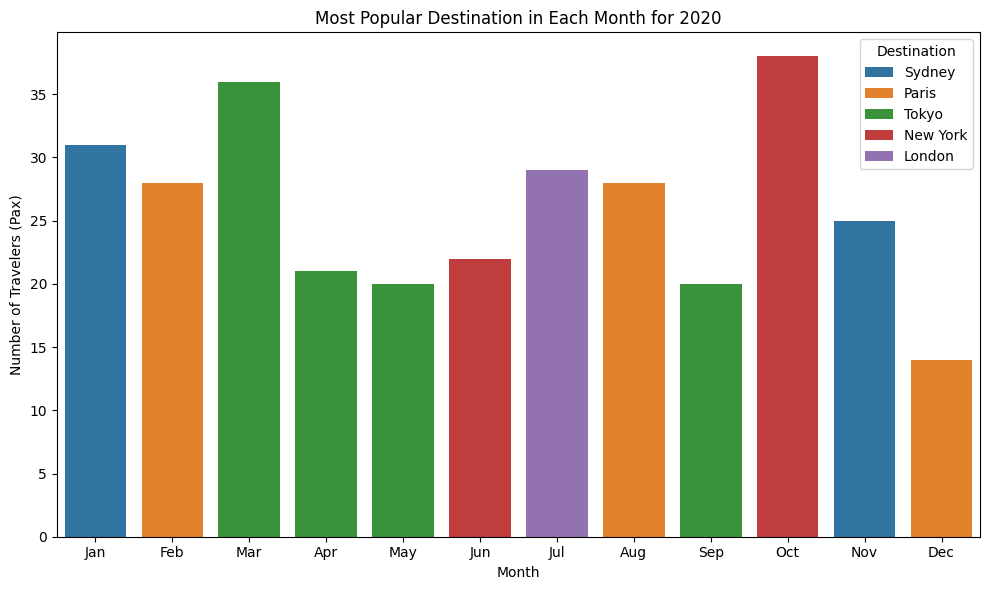

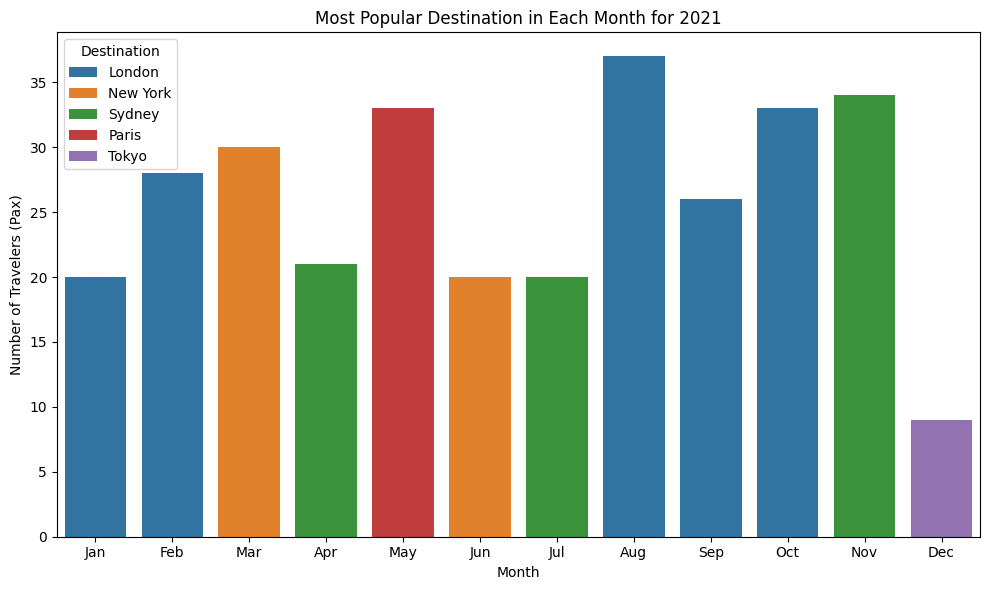

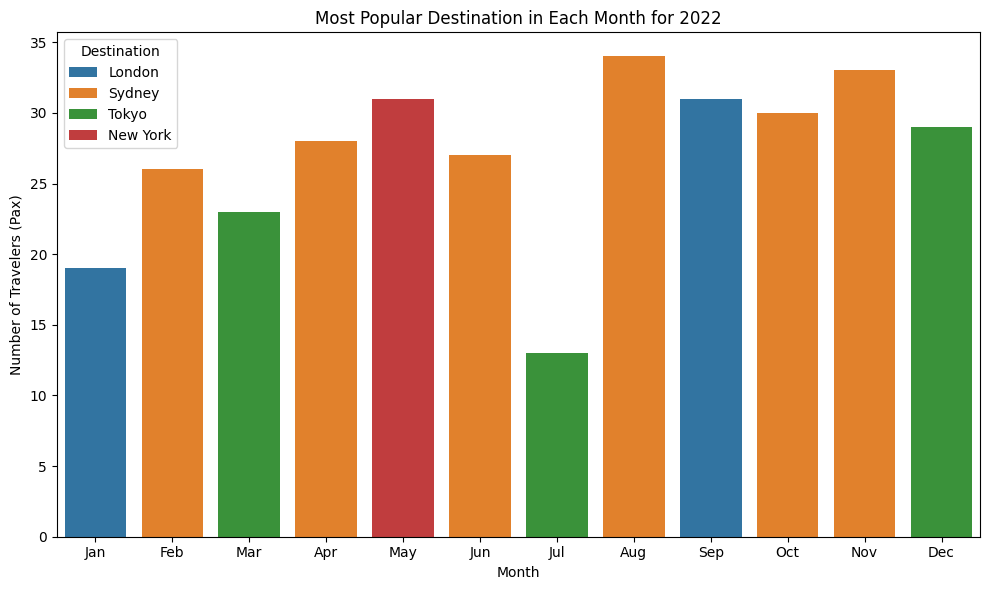

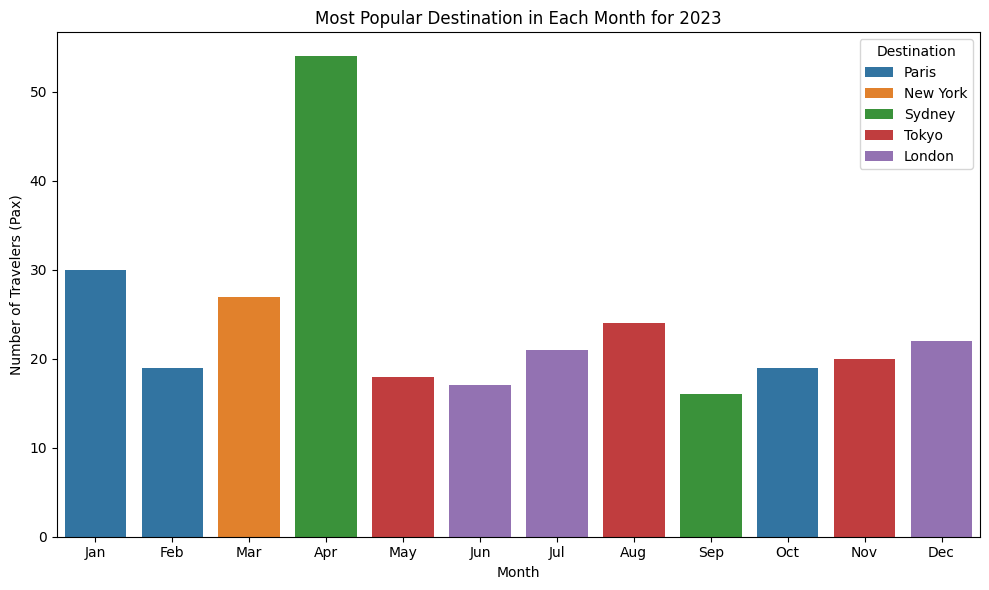

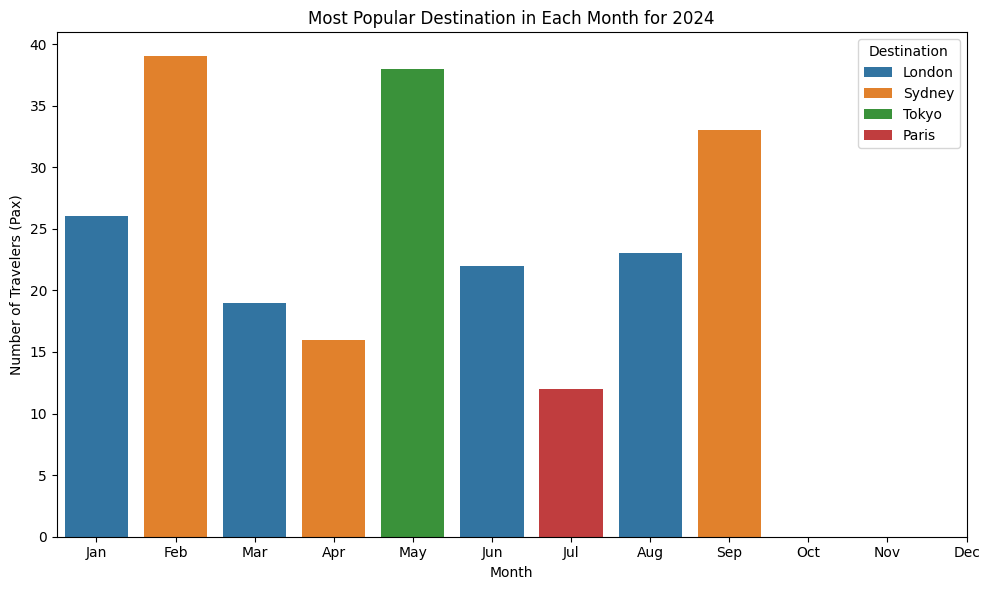

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Load and preprocess your dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('MOCK_DATA.csv')

# For demonstration purposes, let's create a sample DataFrame
# Remove or replace this section with your actual data loading code

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 2: Set 'date' as the index
df.set_index('date', inplace=True)

# Step 3: Aggregate data by month to get total travelers (pax)
monthly_pax = df.resample('M').sum()['pax']

# Step 4: Fit SARIMA model to forecast future monthly travelers
# You may need to adjust the SARIMA parameters based on your data
model = SARIMAX(monthly_pax, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

# Step 5: Forecast future values (e.g., next 12 months)
forecast_steps = 12
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_pax.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Step 6: Visualize the SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_pax, label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, confidence_interval['lower pax'], confidence_interval['upper pax'], color='pink', alpha=0.3)
plt.title('SARIMA Forecast of Monthly Travelers')
plt.xlabel('Date')
plt.ylabel('Number of Travelers (Pax)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Group by year, month, and destination, then sum the number of travelers (pax)
df['year'] = df.index.year
df['month'] = df.index.month
monthly_dest = df.groupby(['year', 'month', 'destination'])['pax'].sum().reset_index()

# Step 8: Identify the most popular destination for each month in each year
popular_destinations = monthly_dest.loc[monthly_dest.groupby(['year', 'month'])['pax'].idxmax()]

# Step 9: Loop through each year and generate a bar plot for each one
years = popular_destinations['year'].unique()

for year in years:
    # Filter data for the current year
    yearly_data = popular_destinations[popular_destinations['year'] == year]
    
    # Create a bar plot for the most popular destination each month for the current year
    plt.figure(figsize=(10, 6))
    sns.barplot(x=yearly_data['month'], y=yearly_data['pax'], hue=yearly_data['destination'])
    
    plt.title(f'Most Popular Destination in Each Month for {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Travelers (Pax)')
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Destination')
    plt.tight_layout()
    
    # Show the plot for each year
    plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE for the historical data
predictions = sarima_fit.predict(start=0, end=len(monthly_pax)-1)
mae = mean_absolute_error(monthly_pax, predictions)
rmse = np.sqrt(mean_squared_error(monthly_pax, predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 21.25368220449954
Root Mean Squared Error (RMSE): 28.279830222886716
